Q1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


To perform a matrix multiplication between an (n, k) matrix and a (k, m) matrix, the number of:

1] **Multiplications**: n * m * k

2] **Additions**: n * m * (k - 1)

**Explaination**:

1] **Multiplications**:

The resulting matrix will be of size (n, m). Hence, there will be n * m elements in the result matrix. For each element in this result matrix, you need to multiply k pairs of numbers.

Therefore, the total number of multiplications is n * m * k.


2] **Additions**:

The resulting matrix will be of size (n, m). Hence, there will be n * m elements in the result matrix. Consider each element of the result matrix.
For each element, you multiply k pairs of numbers and then add these k products together. Adding k numbers requires (k - 1) addition operations.

Therefore, the total number of additions is n * m * (k - 1).



Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [ ]:
import time
import random
import numpy as np

# Matrix multiplication using list of lists
def matrix_multiply(matrix_A, matrix_B):
  n = len(matrix_A)
  k = len(matrix_A[0])
  m = len(matrix_B[0])
  final_matrix = [[0]*m for no_of_columns in range(n)]
  for i in range(n):
    for j in range(m):
      for l in range(k):
        final_matrix[i][j] += matrix_A[i][l] * matrix_B[l][j]
  return final_matrix

# Matrix multiplication using numpy
def matrix_multiply_numpy(matrix_A, matrix_B):
  return np.dot(matrix_A, matrix_B)

# Generating random matricies
for _ in range(2):
  n= int(input("Enter the value of n: "))
  k= int(input("Enter the value of k: "))
  m= int(input("Enter the value of m: "))
  A = [[random.random() for x in range(k)] for x in range(n)]
  B = [[random.random() for x in range(m)] for x in range(k)]

  # Calculating time for computation by list of lists method
  start_time = time.time()
  final_matrix_lists = matrix_multiply(A, B)
  end_time = time.time()
  list_time = end_time - start_time
  print("Time taken to multiply 2 matrices by list of lists method:", list_time)

  # Calculating time for computation using numpy
  matrix_A_np = np.array(A)
  matrix_B_np = np.array(B)
  start_time = time.time()
  final_matrix_np = matrix_multiply_numpy(matrix_A_np, matrix_B_np)
  end_time = time.time()
  np_time = end_time - start_time
  print("Time taken to multiply 2 matrices using numpy:", np_time)
  print()

Enter the value of n: 4
Enter the value of k: 3
Enter the value of m: 2
Time taken to multiply 2 matrices by list of lists method: 2.86102294921875e-05
Time taken to multiply 2 matrices using numpy: 0.0014119148254394531

Enter the value of n: 100
Enter the value of k: 101
Enter the value of m: 100
Time taken to multiply 2 matrices by list of lists method: 0.20167279243469238
Time taken to multiply 2 matrices using numpy: 0.001680612564086914



**OBSERVATIONS**:

We observe that the list of lists methods is faster than numpy for smaller values of n,k and m. However, the numpy method is significantly faster than list of lists method for larger values of n, k and m.

**REASON:**

For samller values of n,m and k. For small matrices, the process of creating NumPy arrays and calling the optimized functions can outweigh the benefits.
For larger values, numpy is significantly faster for following reasons:

1] Numpy's base code is written in C, which is more faster than python.

2] NumPy arrays are more memory-efficient than Python lists, allowing for faster data access.

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Say, time taken to go through the list = n
To find the ith highest number, total time taken = i x n

i) i is even: When i is even, median = n/2 + 1

Therefore, total time = [n/2 +1] x n = [(n^2) + 2n]/2

**Time Complexity = O(n^2)**

ii) i is odd: When i is odd, median = n+1/2

Therefore, total time = [n+1/2] x n = [(n^2) + n]/2

**Time Complexity = O(n^2)**

# Alternate method:


In [7]:
#MergeSort -- time complexity = O(nlog(n))
import random

def mergesort(arr):
  if len(arr) <= 1:
    return arr
  mid = len(arr) // 2
  left = arr[:mid]
  right = arr[mid:]
  left = mergesort(left)
  right = mergesort(right)
  return merge(left,right)

def merge(left, right):
  temp_arr = []
  i=j=0
  while i < len(left) and j < len(right):
    if left[i] < right[j]:
      temp_arr.append(left[i])
      i+=1
    else:
      temp_arr.append(right[j])
      j+=1
  while i < len(left):
    temp_arr.append(left[i])
    i+=1
  while j < len(right):
    temp_arr.append(right[j])
    j+=1
  return temp_arr

example_array = [random.randint(-10,10) for i in range(10)]
print('example array:',example_array)
sorted_array = mergesort(example_array)
print('sorted array:',sorted_array)
median = sorted_array[int(((len(example_array)+1)/2)-1)] if len(example_array)%2!=0 else (sorted_array[int(((len(example_array))/2)-1)]+sorted_array[int(((len(example_array))/2))])/2
print('median:',median)


example array: [-7, 9, 3, -2, -6, -8, 2, -6, -1, -5]
sorted array: [-8, -7, -6, -6, -5, -2, -1, 2, 3, 9]
median: -3.5


Q4. What is the gradient of the following function with respect to x and y?

$x^2 y + y^3 \sin(x)$


Partial derivative with respect to ( x ):

$\frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2 y + y^3 \sin(x) \right) = 2xy + y^3 \cos(x)$


Partial derivative with respect to \( y \):

$\frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2 y + y^3 \sin(x) \right) = x^2 + 3y^2 \sin(x)$


Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [3]:
!pip install jax --quiet

In [18]:
from jax import grad
import jax.numpy as jnp
import numpy as np

def f(arr):
    x, y = arr
    return x**2 * y + y**3 * jnp.sin(x)

x = float(input('Enter x coordinate: '))
y = float(input('Enter y coordinate: '))
gradient = grad(f)(jnp.array([x,y]))
print(f'Gradient at ({x},{y}) is: ', gradient)

# Comparing solution to analytical method
f1_x = lambda x,y: 2*x*y + (y**3)*np.cos(x)
f1_y = lambda x,y: x**2 + 3*(y**2)*np.sin(x)
print(f'Gradient wrt x at ({x},{y}) calculated by analytical method: {f1_x(x,y)}')
print(f'Gradient wrt y at ({x},{y}) calculated by analytical method: {f1_y(x,y)}')

Enter x coordinate: 1
Enter y coordinate: 2
Gradient at (1.0,2.0) is:  [ 8.322418  11.0976515]
Gradient wrt x at (1.0,2.0) calculated by analytical method: 8.322418446945118
Gradient wrt y at (1.0,2.0) calculated by analytical method: 11.097651817694757


Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
!pip install sympy --quiet

In [22]:
import sympy as sp

x, y = sp.symbols('x y')
f = (x**2) * y + (y**3) * sp.sin(x)
gradient_x = sp.diff(f, x)
gradient_y = sp.diff(f, y)

print(f'Gradient wrt x: {gradient_x}')
print(f'Gradient wrt y: {gradient_y}')


Gradient wrt x: 2*x*y + y**3*cos(x)
Gradient wrt y: x**2 + 3*y**2*sin(x)


Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

    2022
        Branch 1
            Roll Number: 1, Name: N, Marks:
                Maths: 100, English: 70 …
        Branch 2
    2023
        Branch 1
        Branch 2
    2024
        Branch 1
        Branch 2
    2025
        Branch 1
        Branch 2


In [27]:
student_data = {2022: {'Branch 1': {'Student 1':{'Roll No.':1 , 'Name':'N' , 'Marks': {'Maths':100 , 'English':70}}},'Branch 2': {}}, 2023: {'Branch 1': {},'Branch 2': {}}, 2024: {'Branch 1': {},'Branch 2': {}}, 2025: {'Branch 1': {},'Branch 2': {}}}
print(student_data)

{2022: {'Branch 1': {'Student 1': {'Roll No.': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}}, 'Branch 2': {}}, 2023: {'Branch 1': {}, 'Branch 2': {}}, 2024: {'Branch 1': {}, 'Branch 2': {}}, 2025: {'Branch 1': {}, 'Branch 2': {}}}


Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [4]:
class year:
  def __init__(self, year):
    self.year = year
    self.branches = []

  def add_branch(self, branch):
    self.branches.append(branch)

class branch:
  def __init__(self, name):
    self.name = name
    self.students = []

  def add_student(self, student):
    self.students.append(student)

class student:
  def __init__(self, roll_no, name):
    self.roll_no = roll_no
    self.name = name
    self.subj = []

  def add_marks(self, marks):
    self.subj.append(marks)

class marks:
  def __init__(self, subject, marks):
    self.subject = subject
    self.marks = marks

Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1]$y=x$

2]$y= x^2$

3]$y= \frac{x^3}{100}$

4]$y = \sin(x)$

5]$y = \frac{\sin(x)}{x}$

6]$y = \log(x)$

7]$y = e^x$

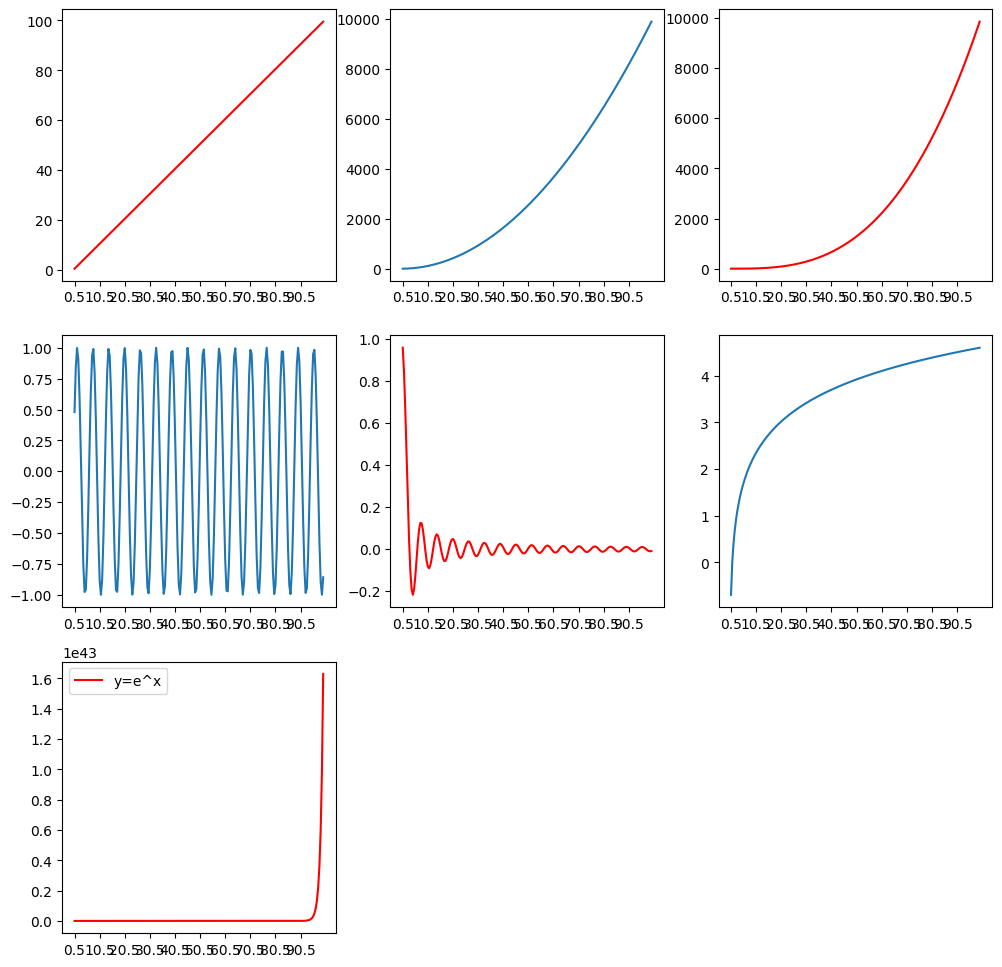

In [43]:
import matplotlib.pyplot as plt
import numpy as np

x= np.arange(0.5,100.0,0.5)
fig = plt.figure(figsize=(12,12))

#1
y=x
plot1 = fig.add_subplot(3,3,1)
plot1.set_xticks(np.arange(0.5,100,10))
plot1.plot(x,y , label='y=x', color='r')

#2
y=x**2
plot2 = fig.add_subplot(3,3,2)
plot2.set_xticks(np.arange(0.5,100,10))
plot2.plot(x,y , label='y=x^2')

#3
y=x**3/100
plot3 = fig.add_subplot(3,3,3)
plot3.set_xticks(np.arange(0.5,100,10))
plot3.plot(x,y , label='y=x^3/100', color='r')

#4
y=np.sin(x)
plot4 = fig.add_subplot(3,3,4)
plot4.set_xticks(np.arange(0.5,100,10))
plot4.plot(x,y , label='y=sin(x)')

#5
y=np.sin(x) / x
plot5 = fig.add_subplot(3,3,5)
plot5.set_xticks(np.arange(0.5,100,10))
plot5.plot(x,y , label='y=sin(x)/x' , color='r')

#6
y=np.log(x)
plot6 = fig.add_subplot(3,3,6)
plot6.set_xticks(np.arange(0.5,100,10))
plot6.plot(x,y , label='y=log(x)')

#7
y=np.exp(x)
plot7 = fig.add_subplot(3,3,7)
plot7.set_xticks(np.arange(0.5,100,10))
plot7.plot(x,y , label='y=e^x' , color='r')


plt.legend()
plt.show()

Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [55]:
import numpy as np
import pandas as pd

print('Matrix')
matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix)

Matrix
[[1.90512726 1.59024138 1.52232505 1.12193695 1.77063019]
 [1.92302679 1.70708993 1.57554405 1.05817196 1.31646156]
 [1.41345044 1.5923958  1.06933084 1.00840534 1.23363645]
 [1.87748545 1.73760977 1.36605436 1.41243366 1.37586723]
 [1.97289319 1.52494077 1.90845831 1.72830377 1.91488687]
 [1.99132001 1.08607145 1.31959909 1.20285722 1.12412498]
 [1.4689334  1.59583274 1.94993895 1.68110687 1.35142957]
 [1.77143973 1.12687661 1.42580524 1.56681936 1.79544219]
 [1.23458012 1.31575951 1.93599492 1.9750145  1.91307306]
 [1.41233459 1.66803259 1.29735477 1.6626652  1.92879033]
 [1.97668333 1.70105934 1.84999534 1.17689583 1.96282545]
 [1.54491725 1.62248242 1.24027776 1.68998569 1.76190974]
 [1.4257454  1.86885039 1.59728692 1.72150422 1.51787855]
 [1.77056952 1.22690687 1.84362908 1.51641863 1.65703916]
 [1.94098248 1.73895929 1.51060997 1.61882512 1.0027658 ]
 [1.16209637 1.70716244 1.50823629 1.40267277 1.02723051]
 [1.69812996 1.17422523 1.7225883  1.00989375 1.50676065]
 [1.152

In [56]:
print('\nDataframe')
df= pd.DataFrame(matrix, columns=['a','b','c','d','e'])
display(df)


Dataframe


,a,b,c,d,e
0,1.905127,1.590241,1.522325,1.121937,1.770630
1,1.923027,1.707090,1.575544,1.058172,1.316462
2,1.413450,1.592396,1.069331,1.008405,1.233636
3,1.877485,1.737610,1.366054,1.412434,1.375867
4,1.972893,1.524941,1.908458,1.728304,1.914887
5,1.991320,1.086071,1.319599,1.202857,1.124125
6,1.468933,1.595833,1.949939,1.681107,1.351430
7,1.771440,1.126877,1.425805,1.566819,1.795442
8,1.234580,1.315760,1.935995,1.975015,1.913073
9,1.412335,1.668033,1.297355,1.662665,1.928790


In [58]:
highest_sd = None
highest_sd_column = None
for column_name, column_data in df.items():
  if highest_sd == None:
    highest_sd = column_data.std()
    highest_sd_column = column_name
  else:
    if column_data.std() > highest_sd:
      highest_sd = column_data.std()
      highest_sd_column = column_name
print(f'Column with highest standard deviation: {highest_sd_column} with a standard deviation of {highest_sd}')

lowest_mean = None
lowest_mean_row = None
for index, row in df.iterrows():
  if lowest_mean == None:
    lowest_mean = row.mean()
    lowest_mean_row = index
  else:
    if row.mean() < lowest_mean:
      lowest_mean = row.mean()
      lowest_mean_row = index
print(f'index of row with lowest mean: {lowest_mean_row} with a mean of {lowest_mean}')

Column with highest standard deviation: d with a standard deviation of 0.319659907916856
index of row with lowest mean: 2 with a mean of 1.2634437748082934


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [61]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = df['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')
display(df)

,a,b,c,d,e,f,g
0,1.905127,1.590241,1.522325,1.121937,1.770630,7.910261,LT8
1,1.923027,1.707090,1.575544,1.058172,1.316462,7.580294,LT8
2,1.413450,1.592396,1.069331,1.008405,1.233636,6.317219,LT8
3,1.877485,1.737610,1.366054,1.412434,1.375867,7.769450,LT8
4,1.972893,1.524941,1.908458,1.728304,1.914887,9.049483,GT8
5,1.991320,1.086071,1.319599,1.202857,1.124125,6.723973,LT8
6,1.468933,1.595833,1.949939,1.681107,1.351430,8.047242,GT8
7,1.771440,1.126877,1.425805,1.566819,1.795442,7.686383,LT8
8,1.234580,1.315760,1.935995,1.975015,1.913073,8.374422,GT8
9,1.412335,1.668033,1.297355,1.662665,1.928790,7.969177,LT8


In [68]:
sd_LT8 = df["f"][df['g']=='LT8'].std()
sd_GT8 = df["f"][df['g']=='GT8'].std()
print(f'The standard deviation of column f where rows are LT8 is {sd_LT8}')
print(f'The standard deviation of column f where rows are GT8 is {sd_GT8}')

The standard deviation of column f where rows are LT8 is 0.5539023605261115
The standard deviation of column f where rows are GT8 is 0.3657539765280508


Q12. Write a small piece of code to explain broadcasting in numpy.

In [1]:
import numpy as np
# Broadcasting in numpy
# We can perform arithmetic operations between arrays of different shapes if NumPy can transform these arrays so that they all have the same shape. This conversion is called broadcasting.

# Example 1: Scalar and array
a = np.array([1, 2, 3])
b = 2 #b is coverted to [2,2,2]
print(a * b)

# Example 2: Two arrays with different shapes
a = np.array([[1, 2, 3], [4, 5, 6]])
b = np.array([10, 20, 30]) #b is converted to [[10,20,30],[10,20,30]]
print(a + b)


[2 4 6]
[[11 22 33]
 [14 25 36]]


Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [2]:
import numpy as np
array = np.random.choice(range(-100,101), 140, replace=False)
print(array)
id_min, min = None,None
for id,val in np.ndenumerate(array):
  if min == None:
    min = val
    id_min = id
  else:
    if val < min:
      min = val
      id_min = id
print(f'The index of the element with min value is {id_min} with value {min}')
print(f'The argmin function of numpy returns {np.argmin(array)}')

[ 90  85  71 -73   5 -31 100 -70 -17 -67 -56 -36  98 -33 -26 -63 -83 -50
 -14  96 -97 -64 -41 -11 -10  27   4  72  88 -74  -5 -95 -55 -78 -52 -43
 -62  47  50  73  13  23  38 -44  45 -82  64  35   9  24 -21 -66 -65 -45
   7 -47  32  30   6  -7 -54  86  -8 -72  77  54  -9  -2 -38 -58  -6  42
 -35 -59  11 -18 -77 -99 -37 -13 -91  10  -1 -29 -19  81  63  44 -40 -93
 -79  78  25  95  19  22  40 -76  84 -27  37  39 -25 -85 -89  82  65  74
 -61  51  14 -32  69  53 -34 -30 -46 -94 -60  89  29  41  49  16  43  52
 -42  20  62  70   1 -96 -87 -80 -22  12 -28 -53 -68  93]
The index of the element with min value is (77,) with value -99
The argmin function of numpy returns 77
